# Introduction to Convolution Neural Network
A **Convolutional Neural Network** (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

**Importing Libraries:**

In [1]:
#For Processing Data
import numpy as np
import pandas as pd
#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Ignore Version Warning (make notebook look clean)
import warnings
warnings.filterwarnings('ignore')

**Loading and Visualizing Dataset**:

Dataset Used:
![MNIST](https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png)

In [2]:
train = pd.read_csv("train.csv")
print(train.shape)
train[-22:-17]

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41978,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41979,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41980,7,0,0,0,0,0,0,0,0,0,...,27,253,110,0,0,0,0,0,0,0
41981,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41982,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**X Y Split:**

In [3]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

Text(0.5, 1.0, 'Frequency of digit classes')

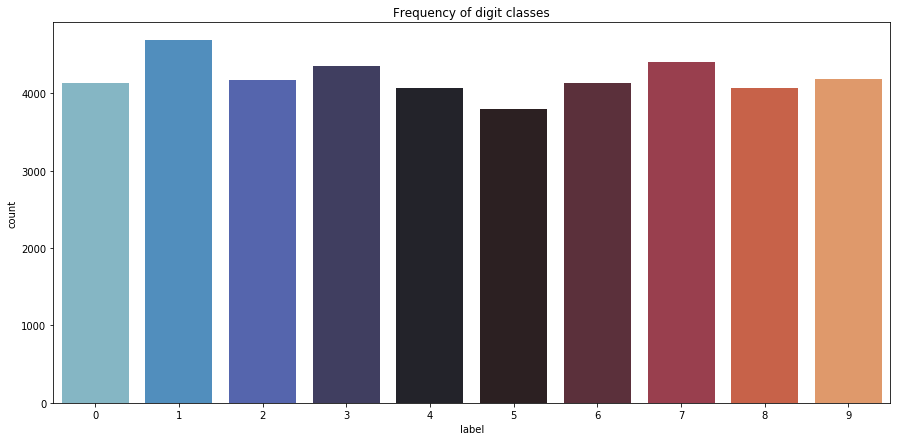

In [4]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Frequency of digit classes")

**Reshaping Matrix:**

[1x9] to [3x3]
![reshape](https://backtobazics.com/wp-content/uploads/2018/08/numpy-reshape-vector-to-matrix.jpg)

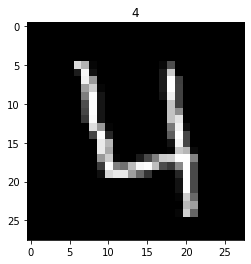

In [5]:
img = X_train.iloc[3].as_matrix()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.show()

**Normalization:**
- We perform a grayscale normalization to reduce the effect of **illumination's differences**.
- If we perform normalization, CNN works **faster**.

In [6]:
X_train = X_train / 255.0
print("x_train shape: ",X_train.shape)

x_train shape:  (42000, 784)


In [7]:
X_train[-22:-17]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.105882,0.992157,0.431373,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Reshape:**
- Train and test images **(28 x 28)**
- We reshape all data to **28x28x1 3D matrices**.
- Keras needs an extra dimension in the end which correspond to **channels**. Our images are gray scaled so it use only one channel. (RGB image would use 3 channels, one for each color)

In [8]:
X_train = X_train.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)

x_train shape:  (42000, 28, 28, 1)


**Label Encoding:**
![oneHot](https://miro.medium.com/max/1879/1*O_pTwOZZLYZabRjw3Ga21A.png)

In [9]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

**Train Test Split:**
- We split the data into train and test sets.
- test size is 10%.
- train size is 90%.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


**Convolutional Neural Network:**
![cnn](https://preview.ibb.co/nRkBpp/gec2.jpg)

**Why CNN over ANN?:**
![1](imgs/1.png)
![2](imgs/2.png)
![3](imgs/3.png)

**Feature Maps:**
![4](imgs/4.png)
![5_1](imgs/5_1.png)
![5_2](imgs/5_2.png)
![6](imgs/6.png)

**ReLU & Max Pooling:**
![7](imgs/7.png)

**Linear VS Nonlinear Classifier:**
![8](imgs/8.png)

**Dropout:**
![9](imgs/9.png)

**Fully Connected Layer (Dense):**
![10](imgs/10.png)

**Softmax:**
![11](imgs/11.png)

In [11]:
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

**Gradient Descent & Optimizers:**
![12](imgs/12.png)

In [12]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

**Compiling the model:**
![13](imgs/13.png)

In [13]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

**Epochs and Batch Size:**
- Say you have a dataset of 10 examples (or samples). You have a **batch size** of 2, and you've specified you want the algorithm to run for 3 **epochs**. Therefore, in each epoch, you have 5 **batches** (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations **per epoch**.

In [14]:
epochs = 10  # for better result increase the epochs
batch_size = 250

**Data Augmentation:**
![14](imgs/14.png)

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

**Fit the model:**

In [16]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val))

Epoch 1/10
152/152 [==============================] - 10s 67ms/step - loss: 1.0868 - accuracy: 0.6346 - val_loss: 0.2028 - val_accuracy: 0.9467
Epoch 2/10
152/152 [==============================] - 10s 64ms/step - loss: 0.4061 - accuracy: 0.8713 - val_loss: 0.1156 - val_accuracy: 0.9700
Epoch 3/10
152/152 [==============================] - 11s 69ms/step - loss: 0.2993 - accuracy: 0.9070 - val_loss: 0.0914 - val_accuracy: 0.9738
Epoch 4/10
152/152 [==============================] - 11s 70ms/step - loss: 0.2444 - accuracy: 0.9233 - val_loss: 0.0740 - val_accuracy: 0.9771
Epoch 5/10
152/152 [==============================] - 11s 70ms/step - loss: 0.2156 - accuracy: 0.9321 - val_loss: 0.0682 - val_accuracy: 0.9802oss: 0.2159 - 
Epoch 6/10
152/152 [==============================] - 11s 70ms/step - loss: 0.1975 - accuracy: 0.9383 - val_loss: 0.0602 - val_accuracy: 0.9817
Epoch 7/10
152/152 [==============================] - 11s 70ms/step - loss: 0.1874 - accuracy: 0.9418 - val_loss: 0.0575 -

**Evaluate the model:**


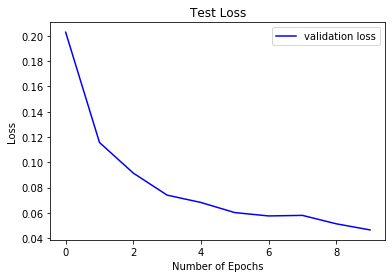

In [17]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

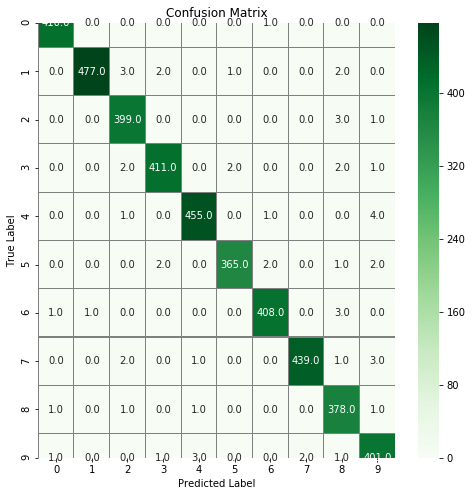

In [18]:
import seaborn as sns
Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()